In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os.path
import math
import os 
from tqdm import tqdm_notebook as tqdm
import re
from datetime import datetime
import scipy.stats as stats
import time
from scipy.stats.stats import pearsonr
PI=math.pi

In [21]:
blocks = np.array([0.15 + i * 0.05 for i in range(0,16,1)])
poisk11 = pd.DataFrame()
index11 = 0
for I in tqdm(range(5,6,1)):
# Чтение файлов по 8 диноду
#
#
    directory = 'D:\prisma-16' 
    files = os.listdir(directory) 
    for d in tqdm(files): 
        s=str(d)
        if (s.startswith('Eas')): 
            file_name=r"D:\prisma-16\%s"%(s)
            file = open(file_name, 'r')
            day=int(s[3:5:1])
            month=int(s[6:8:1])
            year=int(s[9:13:1])
            index=0
            arr = []
            time=[]
            amplitude=[]
            row=[]
            line=file.readline()
            while (len(line)>0):
                i=0
                if (len(line)<12) & (line.split()[0]!='-11111111'):
                    index=[int(h) for h in line.split()][0]
                    row = map(float, line.split())
                    line=file.readline()
                elif (len(line)>12):
                    row = list(map(float, line.split()))
                    arr.append(list(row))
                    line=file.readline()
                else:
                    line=file.readline()
                    arr=np.array(arr)
                    time=arr[:,12]
                    amplitude=arr[:,13]
                    Amax=amplitude.max()
                    maxAind = amplitude.argmax()
                    if ((Amax > 60) & (maxAind < 100)):    
                            for j in range(0,maxAind-1,1):
                                if (amplitude[j]==(Amax*blocks[I])): 
                                    halftime=time[j]

                                elif (amplitude[j]<(Amax*blocks[I])) & (amplitude[j+1]>(Amax*blocks[I])): 
                                    halftime = int(time[j] + 20 * ((Amax*blocks[I] - amplitude[j]) / (amplitude[j+1] - amplitude[j])))  

                            poisk11.loc[0,index11] = Amax*blocks[I] / halftime
                            index11 = index11 + 1
                    arr=[]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in double_scalars


In [39]:
poisk11 = pd.DataFrame(poisk11)
poisk11 = poisk11[poisk11<1000]
poisk11.dropna(inplace = True)
poisk11 = poisk11[poisk11<1000]
poisk11

,0,1,2,3,4,5,6,7,8,9,...,5608,5609,5610,5611,5612,5613,5614,5615,5616,5617


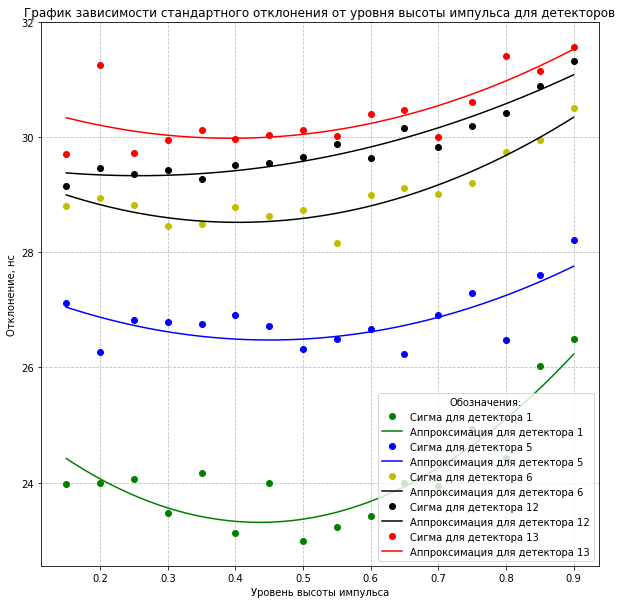

In [3]:
#  Построение сигм
x1 =  np.array([23.976, 23.993, 24.062, 23.475, 24.171, 23.129, 23.986, 22.982, 23.220, 23.411, 23.995, 23.935, 24.925, 24.423, 26.018, 26.488])
x5 =  np.array([27.122, 26.271, 26.825, 26.793, 26.751, 26.905, 26.715, 26.313, 26.490, 26.677, 26.236, 26.904, 27.302, 26.480, 27.601, 28.214])
x6 = np.array([28.810, 28.943, 28.818, 28.467, 28.502, 28.794, 28.634, 28.745, 28.158, 29.006, 29.118, 29.017, 29.205, 29.741, 29.958, 30.504])
x12 = np.array([29.160, 29.469, 29.363, 29.432, 29.280, 29.526, 29.558, 29.655, 29.886, 29.648, 30.166, 29.837, 30.203, 30.432, 30.885, 31.334])
x13 = np.array([29.711, 31.253, 29.727, 29.949, 30.124, 29.964, 30.041, 30.122, 30.025, 30.406, 30.470, 30.001, 30.622, 31.413, 31.161, 31.573])
y = np.array([0.15, 0.2, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90])

dis=np.linspace(0.15,0.9,num=100)
plt.figure(1, figsize = (10,10))

# Вторая линия
z=np.polyfit(y,x1,2)
plt.plot(y, x1, 'go', label = 'Сигма для детектора 1')
plt.plot(dis, z[0]*dis**2 + z[1]*dis + z[2], 'g-', label = 'Аппроксимация для детектора 1')

# Третья линия
z=np.polyfit(y,x5,2)
plt.plot(y, x5, 'bo', label = 'Сигма для детектора 5')
plt.plot(dis, z[0]*dis**2 + z[1]*dis + z[2], 'b-', label = 'Аппроксимация для детектора 5')

# Четвертая линия
z=np.polyfit(y,x6,2)
plt.plot(y, x6, 'yo', label = 'Сигма для детектора 6')
plt.plot(dis, z[0]*dis**2 + z[1]*dis + z[2], 'k-', label = 'Аппроксимация для детектора 6')

# Четвертая линия
z=np.polyfit(y,x12,2)
plt.plot(y, x12, 'ko', label = 'Сигма для детектора 12')
plt.plot(dis, z[0]*dis**2 + z[1]*dis + z[2], 'k-', label = 'Аппроксимация для детектора 12')

# Пятая линия
z=np.polyfit(y,x13,2)
plt.plot(y, x13, 'ro', label = 'Сигма для детектора 13')
plt.plot(dis, z[0]*dis**2 + z[1]*dis + z[2], 'r-', label = 'Аппроксимация для детектора 13')


plt.title('График зависимости стандартного отклонения от уровня высоты импульса для детекторов')
plt.legend(title = 'Обозначения:')
plt.xlabel('Уровень высоты импульса')
plt.ylabel('Отклонение, нс')
plt.grid(True, linestyle='--', color='0.75')